In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from shapely.geometry import LineString

In [3]:
csv_file = "marathon_points.csv"  # built with Google my maps from www.olympicgamesmarathon.com"

In [4]:
df = pd.read_csv(csv_file)
gs = gpd.GeoSeries.from_wkt(df["WKT"])
gdf = gpd.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")
gdf["description"] = ""
gdf["km"] = ""
gdf.head()

,WKT,nom,description,geometry,km
0,POINT (23.9619099 38.1533146),Point 1,,POINT (23.96191 38.15331),
1,POINT (23.9642703 38.150716),Point 2,,POINT (23.96427 38.15072),
2,POINT (23.9638411 38.1490286),Point 3,,POINT (23.96384 38.14903),
3,POINT (23.9695488 38.1231724),Point 4,,POINT (23.96955 38.12317),
4,POINT (23.9696776 38.1225309),Point 5,,POINT (23.96968 38.12253),


In [5]:
pts_list = [
    "Point 1",
    "Point 13",
    "Point 38",
    "Point 48",
    "Point 57",
    "Point 65",
    "Point 74",
]
gdf.at[0, "description"] = "Marathon"
gdf.at[0, "km"] = "START"
gdf.at[12, "description"] = "Mati"
gdf.at[12, "km"] = "10 km"
gdf.at[37, "description"] = "Pikermi"
gdf.at[37, "km"] = "20 km"
gdf.at[47, "description"] = "Pallini"
gdf.at[47, "km"] = "25 km"
gdf.at[56, "description"] = "Agia Paraskevi"
gdf.at[56, "km"] = "30 km"
gdf.at[64, "description"] = "Papagou"
gdf.at[64, "km"] = "35 km"
gdf.at[73, "description"] = "Panathenaic Stadium"
gdf.at[73, "km"] = "40 km FINISH"

gdf.head()

,WKT,nom,description,geometry,km
0,POINT (23.9619099 38.1533146),Point 1,Marathon,POINT (23.96191 38.15331),START
1,POINT (23.9642703 38.150716),Point 2,,POINT (23.96427 38.15072),
2,POINT (23.9638411 38.1490286),Point 3,,POINT (23.96384 38.14903),
3,POINT (23.9695488 38.1231724),Point 4,,POINT (23.96955 38.12317),
4,POINT (23.9696776 38.1225309),Point 5,,POINT (23.96968 38.12253),


In [6]:
traj_df = pd.DataFrame(
    [{"name": "route", "geometry": LineString(gdf.geometry.to_list())}]
)
traj_gdf = gpd.GeoDataFrame(traj_df, geometry="geometry", crs="EPSG:4326")
traj_gdf.head()

,name,geometry
0,route,"LINESTRING (23.96191 38.15331, 23.96427 38.150..."


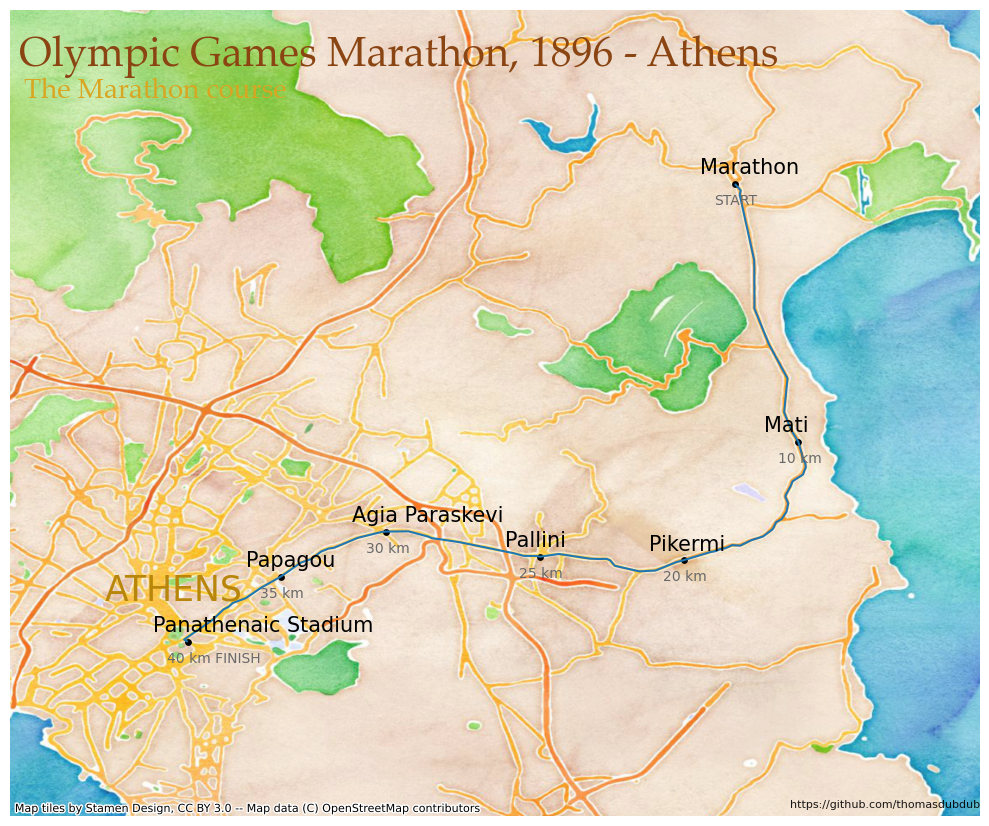

In [8]:
f, ax = plt.subplots(figsize=(10, 10))

epsg = 4815  # Greek (Athens): https://epsg.io/4815
traj_gdf_epsg = traj_gdf.to_crs(epsg=epsg)
gdf_epsg = gdf.to_crs(epsg=epsg)
minx, miny, maxx, maxy = traj_gdf_epsg.geometry.total_bounds
x_pad, y_pad = 0.07, 0.07
ax.set_xlim(minx - x_pad, maxx + x_pad)
ax.set_ylim(miny - y_pad, maxy + y_pad)
traj_gdf_epsg.plot(ax=ax)
gdf_epsg.query("nom in @pts_list").plot(ax=ax, color="black", markersize=15)

for x, y, label, km, nom in zip(
    gdf_epsg.geometry.x,
    gdf_epsg.geometry.y,
    gdf_epsg.description,
    gdf_epsg.km,
    gdf_epsg.nom,
):
    ax.annotate(
        label,
        xy=(x, y),
        xytext=(-25, 7),
        textcoords="offset points",
        size=15.0,
        color="black",
    )
    ax.annotate(
        km,
        xy=(x, y),
        xytext=(-15, -15),
        textcoords="offset points",
        size=10.0,
        color="dimgrey",
    )
    if nom == "Point 74":
        ax.annotate(
            "ATHENS",
            xy=(x, y),
            xytext=(-60, +30),
            textcoords="offset points",
            size=25.0,
            color="darkgoldenrod",
        )

cx.add_basemap(
    ax,
    crs=traj_gdf_epsg.crs.to_string(),
    source=cx.providers.Stamen.Watercolor,
    zoom=12,
    alpha=0.9,
)

ax.axis("off")
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.title(
    "Olympic Games Marathon, 1896 - Athens",
    fontsize=30,
    fontname="Palatino Linotype",
    color="saddlebrown",
    x=0.009,
    y=0.92,
    loc="left",
)

plt.title(
    "The Marathon course",
    fontsize=20,
    fontname="Palatino Linotype",
    color="goldenrod",
    y=0.88,
    x=0.15,
)

plt.title(
    "https://github.com/thomasdubdub",
    fontsize=8,
    color="black",
    alpha=0.9,
    y=0.00,
    loc="right",
)

plt.tight_layout()
plt.savefig("marathon_1896.png", dpi=150, bbox_inches="tight", pad_inches=0)